In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt




In [2]:
import numpy as np
import netCDF4 as nc


In [3]:
# Open the NetCDF file
ds = xr.open_dataset('/data/ycheng/JRA/Data/Python/data_retrospective/surfAll.nc')

# Extract the variable you want to plot
ds = ds['msl']
start_date = '2018-6-4'
# end_date = '2022-12-31'

    # Select data within the specified date range
var = ds.sel(time=start_date)

In [6]:
ds.time

<xarray.DataArray 'time' (time: 1833)>
array(['2017-12-25T00:00:00.000000000', '2017-12-26T00:00:00.000000000',
       '2017-12-27T00:00:00.000000000', ..., '2022-12-29T00:00:00.000000000',
       '2022-12-30T00:00:00.000000000', '2022-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    number             int64 ...
    step               timedelta64[ns] ...
    meanSea            float64 ...
    heightAboveGround  float64 ...
  * time               (time) datetime64[ns] 2017-12-25 ... 2022-12-31

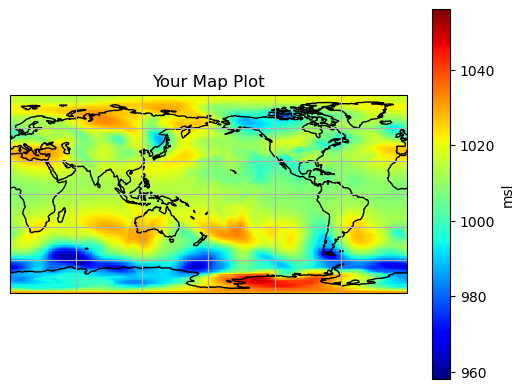

In [7]:
# Define the map projection
projection = ccrs.PlateCarree(central_longitude=180)

# Create the figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': projection})

# Plot the variable on the map
var.plot.imshow(ax=ax, transform=projection, cmap='jet', vmin=958, vmax=1056)

# Add map features (coastlines, gridlines, etc.)
ax.coastlines()
ax.gridlines()

# Set the plot title
plt.title('Your Map Plot')

# Show the plot
plt.show()

In [7]:
ds = nc.Dataset('/data/ycheng/JRA/Data/Python/data_retrospective/surfAll.nc')
 
times = nc.num2date(ds['time'][:],ds['time'].units,\
            only_use_cftime_datetimes=False,only_use_python_datetimes=True)
perday = int(86400/(times[1]-times[0]).total_seconds())
times = times[::perday]

newdata = ds['t2m'][:]

In [8]:
times

masked_array(data=[real_datetime(2017, 12, 25, 0, 0),
                   real_datetime(2017, 12, 26, 0, 0),
                   real_datetime(2017, 12, 27, 0, 0), ...,
                   real_datetime(2022, 12, 29, 0, 0),
                   real_datetime(2022, 12, 30, 0, 0),
                   real_datetime(2022, 12, 31, 0, 0)],
             mask=False,
       fill_value='?',
            dtype=object)

In [9]:
perday

1

In [11]:
newdata2 = np.apply_along_axis(lambda x: np.convolve(x,np.ones(perday)/perday, mode='valid')[::perday],\
                                                              axis=0, arr=newdata)

In [15]:
type(newdata2)

numpy.ndarray

In [14]:
type(newdata)

numpy.ma.core.MaskedArray

In [16]:
time = ds.variables['time'][:]

In [17]:
time

masked_array(data=[ 358,  359,  360, ..., 2188, 2189, 2190],
             mask=False,
       fill_value=999999)

In [19]:
attribute_names = ds.variables['time'].ncattrs()


In [23]:
for attr_name in attribute_names:
    attr_value = getattr(ds.variables['time'], attr_name)
    print(attr_name, "=", attr_value)

units = days since 2017-01-01
calendar = proleptic_gregorian


In [24]:
ds['longitude']

<class 'netCDF4._netCDF4.Variable'>
float64 longitude(longitude)
    _FillValue: nan
    units: degrees_east
    standard_name: longitude
    long_name: longitude
unlimited dimensions: 
current shape = (288,)
filling on

In [25]:
ds['longitude'][:]

masked_array(data=[ -1.25,   0.  ,   1.25,   2.5 ,   3.75,   5.  ,   6.25,
                     7.5 ,   8.75,  10.  ,  11.25,  12.5 ,  13.75,  15.  ,
                    16.25,  17.5 ,  18.75,  20.  ,  21.25,  22.5 ,  23.75,
                    25.  ,  26.25,  27.5 ,  28.75,  30.  ,  31.25,  32.5 ,
                    33.75,  35.  ,  36.25,  37.5 ,  38.75,  40.  ,  41.25,
                    42.5 ,  43.75,  45.  ,  46.25,  47.5 ,  48.75,  50.  ,
                    51.25,  52.5 ,  53.75,  55.  ,  56.25,  57.5 ,  58.75,
                    60.  ,  61.25,  62.5 ,  63.75,  65.  ,  66.25,  67.5 ,
                    68.75,  70.  ,  71.25,  72.5 ,  73.75,  75.  ,  76.25,
                    77.5 ,  78.75,  80.  ,  81.25,  82.5 ,  83.75,  85.  ,
                    86.25,  87.5 ,  88.75,  90.  ,  91.25,  92.5 ,  93.75,
                    95.  ,  96.25,  97.5 ,  98.75, 100.  , 101.25, 102.5 ,
                   103.75, 105.  , 106.25, 107.5 , 108.75, 110.  , 111.25,
                   112.5 